In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import os


import warnings
warnings.filterwarnings('ignore')

**1. Data understanding and exploration**

In [2]:
house = pd.read_csv('House_price.csv')

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#check the data types and nulls

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking for outliers

house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#drop the records with NA in the columns LotFrontage, MasVnrType, MasVnrArea, Electrical
#as they don't have any definition in the data dictionary

house.dropna(subset=['LotFrontage','MasVnrType','MasVnrArea','Electrical','GarageYrBlt'], inplace=True)


In [6]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ['GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType']
for i in null_with_meaning:
    house[i].fillna("none", inplace=True)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1120 non-null   int64  
 1   MSSubClass     1120 non-null   int64  
 2   MSZoning       1120 non-null   object 
 3   LotFrontage    1120 non-null   float64
 4   LotArea        1120 non-null   int64  
 5   Street         1120 non-null   object 
 6   Alley          1120 non-null   object 
 7   LotShape       1120 non-null   object 
 8   LandContour    1120 non-null   object 
 9   Utilities      1120 non-null   object 
 10  LotConfig      1120 non-null   object 
 11  LandSlope      1120 non-null   object 
 12  Neighborhood   1120 non-null   object 
 13  Condition1     1120 non-null   object 
 14  Condition2     1120 non-null   object 
 15  BldgType       1120 non-null   object 
 16  HouseStyle     1120 non-null   object 
 17  OverallQual    1120 non-null   int64  
 18  OverallC

In [8]:
# Dropping the ID column as it's not required

house = house.drop(['Id'], axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,0,none,none,none,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0,none,none,none,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,0,none,none,none,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,0,none,none,none,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,0,none,none,none,0,12,2008,WD,Normal,250000


In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1120 non-null   int64  
 1   MSZoning       1120 non-null   object 
 2   LotFrontage    1120 non-null   float64
 3   LotArea        1120 non-null   int64  
 4   Street         1120 non-null   object 
 5   Alley          1120 non-null   object 
 6   LotShape       1120 non-null   object 
 7   LandContour    1120 non-null   object 
 8   Utilities      1120 non-null   object 
 9   LotConfig      1120 non-null   object 
 10  LandSlope      1120 non-null   object 
 11  Neighborhood   1120 non-null   object 
 12  Condition1     1120 non-null   object 
 13  Condition2     1120 non-null   object 
 14  BldgType       1120 non-null   object 
 15  HouseStyle     1120 non-null   object 
 16  OverallQual    1120 non-null   int64  
 17  OverallCond    1120 non-null   int64  
 18  YearBuil

In [10]:
# Converting the data types of MSSubClass, OverallQual, OverallCond to objects as they are categorical


house[['MSSubClass', 'OverallQual', 'OverallCond']] = house[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1120 non-null   object 
 1   MSZoning       1120 non-null   object 
 2   LotFrontage    1120 non-null   float64
 3   LotArea        1120 non-null   int64  
 4   Street         1120 non-null   object 
 5   Alley          1120 non-null   object 
 6   LotShape       1120 non-null   object 
 7   LandContour    1120 non-null   object 
 8   Utilities      1120 non-null   object 
 9   LotConfig      1120 non-null   object 
 10  LandSlope      1120 non-null   object 
 11  Neighborhood   1120 non-null   object 
 12  Condition1     1120 non-null   object 
 13  Condition2     1120 non-null   object 
 14  BldgType       1120 non-null   object 
 15  HouseStyle     1120 non-null   object 
 16  OverallQual    1120 non-null   object 
 17  OverallCond    1120 non-null   object 
 18  YearBuil

In [11]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
cor = house_numeric.corr()

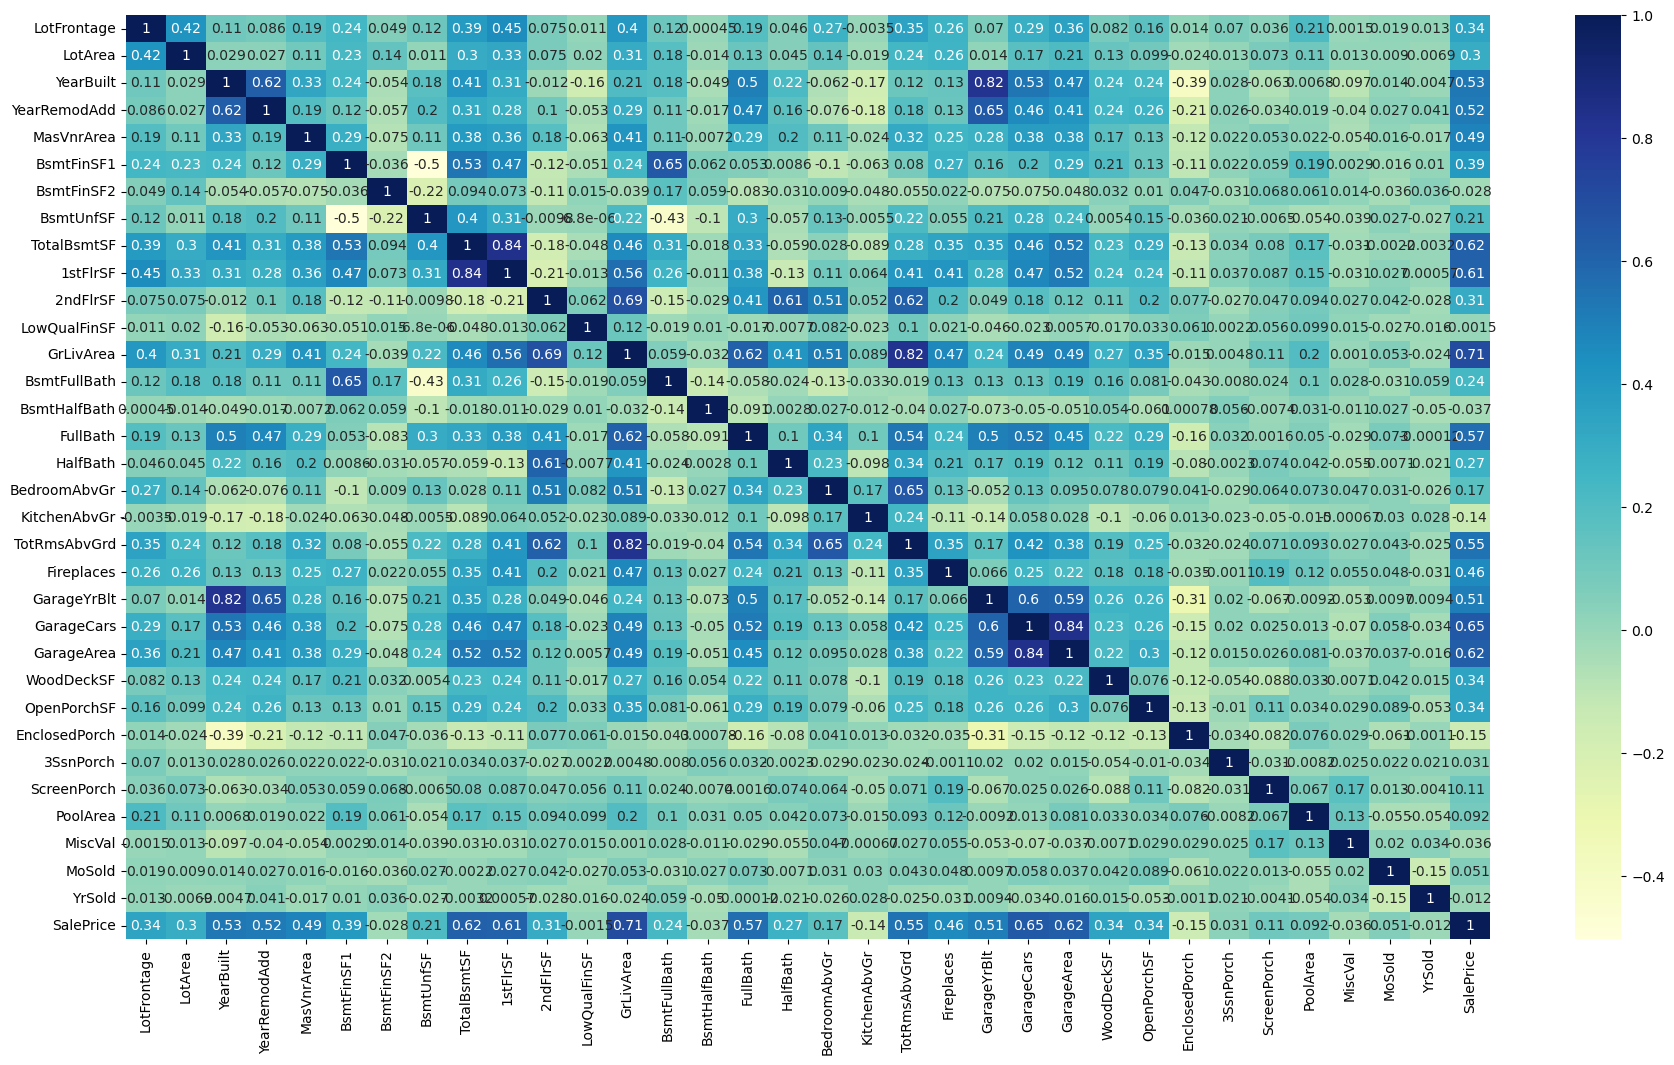

In [13]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(22,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of SalePrice with independent variables:


*   We can observe that SalePrice is positively correlated with GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF






**2. Data Preparation**

In [14]:
# split into X and y

X = house.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']] # predictors in variable X

y = house['SalePrice'] # response variable in Y

In [15]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [16]:
# convert categorial variables into dummies

house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
X = X.drop(list(house_categorical.columns), axis=1)

In [18]:
X = pd.concat([X, house_dummies], axis=1)

In [19]:
from sklearn.preprocessing import scale


# storing column names in cols, since column names are (annoyingly) lost after
# scaling (the df is converted to a numpy array)
cols = X.columns

X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=254)

In [20]:

# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    random_state=50)

**3. Model Building and Evaluation**

In [21]:
# object instantiation and fit a line

lm = LinearRegression()

lm.fit(X_train, y_train)



LinearRegression()

In [22]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

241712365736562.47
[ 1.89502929e+03  5.11879165e+03  7.77814179e+03  6.72085875e+02
  3.52465282e+03 -1.15280386e+16 -3.88591268e+15 -1.10851927e+16
  1.09610668e+16 -8.85547773e+15 -1.00601789e+16 -9.54336584e+14
  1.20156403e+16 -1.24175000e+03  7.73750000e+01  1.63768750e+03
  1.21820703e+03 -3.30875000e+03 -3.95400000e+03  3.48000000e+02
  1.36550000e+03  7.39000000e+02  5.40400000e+03 -1.88575000e+03
  2.28000000e+02  1.28975000e+03  1.45250000e+02  1.42100000e+03
  6.11625000e+02 -3.84062500e+02  2.40000000e+01 -4.84500000e+02
  1.02762500e+03  1.85056250e+03  4.50000000e+02  5.06125000e+02
  3.19000000e+02  1.49787500e+03  2.37987500e+03  4.16375000e+02
 -1.20875000e+02 -1.82875000e+03  6.10814256e+15 -1.25606502e+16
 -1.13250465e+16 -3.89348109e+15 -1.67725000e+03  9.97200000e+03
  5.89300000e+03  1.98440000e+04  1.42597500e+04 -1.52125000e+03
  7.67000000e+02  9.99250000e+02  6.43125000e+02 -4.00000000e+02
 -3.47000000e+03  4.30250000e+02  2.75350000e+03 -8.66500000e+02
  5.44

In [23]:
#Predicting the y values, R2 score, MSE, RMSE
print("Linear reression:")
print("-----------------")
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score train: ' + str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_score test: ' + str(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS train: ' + str(rss1_lr))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS test: ' + str(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ' + str(mse_train_lr))
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ' + str(mse_test_lr))
metric.append(mse_test_lr)


rmse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE train: ' + str(mse_train_lr))
metric.append(rmse_train_lr**0.5)

rmse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE test: ' + str(rmse_test_lr))
metric.append(rmse_test_lr**0.5)


Linear reression:
-----------------
r2_score train: 0.9593146779786779
r2_score test: -3.263802111237982e+22
RSS train: 207205834404.93848
RSS test: 8.550086592384324e+34
MSE train: 264293156.12874806
MSE test: 2.544668628685811e+32
RMSE train: 264293156.12874806
RMSE test: 2.544668628685811e+32


**Ridge and Lasso Regression**

**Ridge:**

In [24]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 100000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X, y)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000, 3000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [25]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [26]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X, y)
print(ridge.coef_)

[ 4.20165543e+02  3.59413018e+03  2.07309336e+03  2.92585746e+03
  3.69982814e+03  2.62524418e+03  8.55759165e+02  2.37430465e+02
  3.30454003e+03  4.96692591e+03  4.65908732e+03 -1.27073629e+02
  7.55136475e+03  2.04497623e+03 -5.69071018e+01  4.35848446e+03
  2.16910744e+03  3.60438834e+02 -2.40194057e+03  4.67359486e+03
  4.18914114e+03  7.76112306e+02  4.93629818e+03  3.11570081e+03
  1.85507519e+03  5.80831344e+02 -2.93277438e+01  1.32522462e+03
  2.10288324e+03  8.06717403e+01 -2.92497055e+02 -3.93354020e+02
  3.71136628e+02 -5.09491311e+02  1.24269647e+02  1.33264967e+02
  5.33439969e+01  6.62587408e+02  8.84759051e+02  5.46449774e+02
 -7.15387057e+02 -4.47435982e+02 -9.52303162e+02 -1.63544019e+03
 -1.71409334e+03 -6.11418928e+02 -7.90032854e+02  1.15440114e+03
  1.32876218e+02  1.16161569e+03 -7.47954159e+02  1.95583593e+03
  1.27525354e+03 -2.49006530e+03 -7.31437795e+02  1.31433795e+03
 -3.64679938e+02  1.53895606e+03  2.82032435e+03 -1.08535693e+03
 -6.15684636e+02 -4.50067

In [27]:
#Predicting the y values, R2 score, MSE, RMSE

print("Ridge reression:")
print("-----------------")
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric1 = []
r2_train_rg = r2_score(y_train, y_pred_train)
print('r2_score train: ' + str(r2_train_rg))
metric1.append(r2_train_rg)

r2_test_rg = r2_score(y_test, y_pred_test)
print('r2_score test: ' + str(r2_test_rg))
metric1.append(r2_test_rg)

rss_train_rg = np.sum(np.square(y_train - y_pred_train))
print('RSS train: ' + str(rss_train_rg))
metric1.append(rss_train_rg)

rss_test_rg = np.sum(np.square(y_test - y_pred_test))
print('RSS test: ' + str(rss_test_rg))
metric1.append(rss_test_rg)

mse_train_rg = mean_squared_error(y_train, y_pred_train)
print('MSE train: ' + str(mse_train_rg))
metric1.append(mse_train_rg)

mse_test_rg = mean_squared_error(y_test, y_pred_test)
print('MSE test: ' + str(mse_test_rg))
metric1.append(mse_test_rg)


rmse_train_rg = mean_squared_error(y_train, y_pred_train)
print('RMSE train: ' + str(rmse_train_rg))
metric1.append(rmse_train_rg**0.5)

rmse_test_rg = mean_squared_error(y_test, y_pred_test)
print('RMSE test: ' + str(rmse_test_rg))
metric1.append(rmse_test_rg**0.5)


Ridge reression:
-----------------
r2_score train: 0.8886345939690743
r2_score test: 0.8926073882092771
RSS train: 567171666194.246
RSS test: 281333272943.04285
MSE train: 723433247.6967423
MSE test: 837301407.5685799
RMSE train: 723433247.6967423
RMSE test: 837301407.5685799


**Lasso:**

In [28]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X, y)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 2000, 3000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [29]:
print(model_cv.best_params_)

{'alpha': 500}


In [30]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

Lasso(alpha=500)

In [31]:
lasso.coef_

array([ 0.00000000e+00,  4.54113472e+03,  7.61865089e+03,  3.01283074e+03,
        2.11302406e+03,  4.02967799e+03,  7.01832150e+02, -0.00000000e+00,
        2.08032949e+03,  0.00000000e+00,  0.00000000e+00, -1.35767810e+03,
        2.75095009e+04,  1.79891210e+03,  0.00000000e+00,  2.86466604e+03,
        3.39926380e+02, -3.49591823e+02, -5.15536482e+03,  6.67122176e+02,
        2.86030013e+03,  0.00000000e+00,  6.18534688e+03,  9.19257117e+02,
        6.24441190e+02,  0.00000000e+00, -0.00000000e+00,  1.17863784e+03,
        2.32231924e+03,  0.00000000e+00,  0.00000000e+00, -5.39510130e+02,
        2.23116039e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.97399382e+02, -0.00000000e+00,
       -2.17042671e+02, -0.00000000e+00, -0.00000000e+00,  3.25074208e+02,
        0.00000000e+00,  1.30037087e+02, -0.00000000e+00,  2.02077832e+03,
        9.78403745e+02, -

In [32]:
#Predicting the y values, R2 score, MSE, RMSE

print("Lasso reression:")
print("-----------------")
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_ls = r2_score(y_train, y_pred_train)
print('r2_score train: ' + str(r2_train_ls))
metric2.append(r2_train_ls)

r2_test_ls = r2_score(y_test, y_pred_test)
print('r2_score test: ' + str(r2_test_ls))
metric2.append(r2_test_ls)

rss_train_ls = np.sum(np.square(y_train - y_pred_train))
print('RSS train: ' + str(rss_train_ls))
metric2.append(rss_train_ls)

rss_test_ls = np.sum(np.square(y_test - y_pred_test))
print('RSS test: ' + str(rss_test_ls))
metric2.append(rss_test_ls)

mse_train_ls = mean_squared_error(y_train, y_pred_train)
print('MSE train: ' + str(mse_train_ls))
metric2.append(mse_train_ls)

mse_test_ls = mean_squared_error(y_test, y_pred_test)
print('MSE test: ' + str(mse_test_ls))
metric2.append(mse_test_ls)


rmse_train_ls = mean_squared_error(y_train, y_pred_train)
print('RMSE train: ' + str(rmse_train_ls))
metric2.append(rmse_train_ls**0.5)

rmse_test_ls = mean_squared_error(y_test, y_pred_test)
print('RMSE test: ' + str(rmse_test_ls))
metric2.append(rmse_test_ls**0.5)

Lasso reression:
-----------------
r2_score train: 0.9197537872083141
r2_score test: 0.9126499794133432
RSS train: 408685065110.7904
RSS test: 228828285051.6275
MSE train: 521281970.8045796
MSE test: 681036562.6536533
RMSE train: 521281970.8045796
RMSE test: 681036562.6536533


In [33]:
betas = pd.DataFrame(index=X.columns)

In [34]:
betas.rows = X.columns

In [35]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

*Comparing the coefficients of Linear, Ridge, Lasso regression models*

In [36]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,1.895029e+03,420.165543,0.000000
LotArea,5.118792e+03,3594.130183,4541.134715
YearBuilt,7.778142e+03,2073.093364,7618.650890
YearRemodAdd,6.720859e+02,2925.857464,3012.830743
MasVnrArea,3.524653e+03,3699.828145,2113.024059
BsmtFinSF1,-1.152804e+16,2625.244181,4029.677987
BsmtFinSF2,-3.885913e+15,855.759165,701.832150
BsmtUnfSF,-1.108519e+16,237.430465,-0.000000
TotalBsmtSF,1.096107e+16,3304.540028,2080.329488
1stFlrSF,-8.855478e+15,4966.925907,0.000000


**Metrics Table**

In [37]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score train','R2 Score test','RSS train','RSS test','MSE train','MSE test', 'RMSE train', 'RMSE test'],
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

#final_metric = pd.concat([lr_metric], axis = 1)

final_metric


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score train,9.593147e-01,8.886346e-01,9.197538e-01
1,R2 Score test,-3.263802e+22,8.926074e-01,9.126500e-01
2,RSS train,2.072058e+11,5.671717e+11,4.086851e+11
3,RSS test,8.550087e+34,2.813333e+11,2.288283e+11
4,MSE train,2.642932e+08,7.234332e+08,5.212820e+08
5,MSE test,2.544669e+32,8.373014e+08,6.810366e+08
6,RMSE train,1.625710e+04,2.689671e+04,2.283160e+04
7,RMSE test,1.595202e+16,2.893616e+04,2.609668e+04


We can see from the above that the R2 score for lasso is high comapred to Ridge and the the no. of coefficients are less in Lasso. Hence we can conclude that Lasso is the best regression model for the given data.

In [38]:
model_parameters = list(lasso.coef_ )
cols = X.columns


In [39]:
mod = list(zip(cols, model_parameters))


In [40]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,LotFrontage,0.000000
1,LotArea,4541.134715
2,YearBuilt,7618.650890
3,YearRemodAdd,3012.830743
4,MasVnrArea,2113.024059


In [41]:
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head()

,Variable,Coeff
131,RoofMatl_CompShg,33602.305566
12,GrLivArea,27509.500925
136,RoofMatl_WdShngl,24061.979284
134,RoofMatl_Tar&Grv,17762.363059
118,OverallQual_9,13367.900244


From the above table we can see the important predictor variables